In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
plt.style.use('seaborn-v0_8')

## Load Datasets

In [ ]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


/tmp/ipython-input-3205252361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetes['preg_times'])


<Axes: xlabel='preg_times', ylabel='Density'>

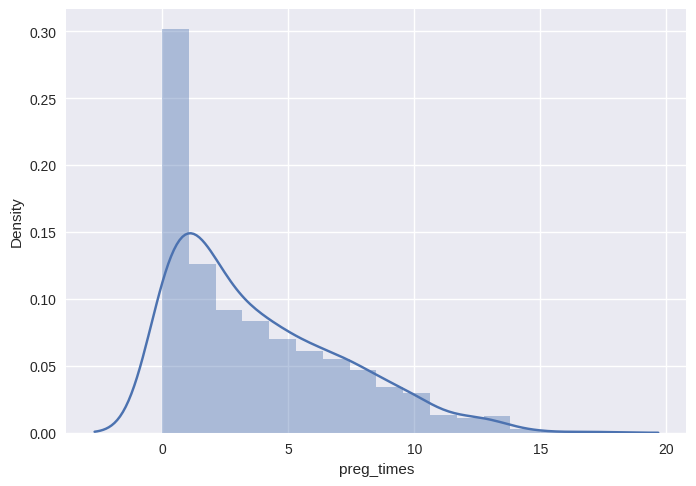

In [ ]:
sns.distplot(df_diabetes['preg_times'])

In [ ]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

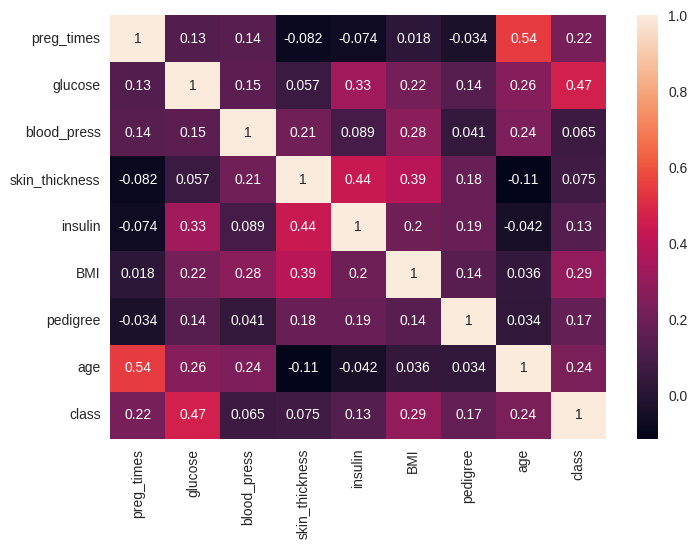

In [ ]:
sns.heatmap(df_diabetes.corr(), annot=True)

## Split Datasets

In [ ]:
features = df_diabetes.values[:,:8]

In [ ]:
labels = df_diabetes.values[:,8:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print(y_train.shape, y_test.shape)

(798,) (154,)


## Define Model

In [ ]:
# define the keras sequential model
model = Sequential()

In [ ]:
# Artificial Neural Network / Multi-layer Perceptron / Fully Connected Neural Network

# Convolutional Neural Network

# Long-Short Term Memory Neural Network

# Dll...


In [ ]:
# relu = range(0,infinit)

In [ ]:
model.add(Dense(12, activation='relu')) # 1st hidden layer
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dropout(0.1))
model.add(Dense(6, activation='relu')) # 3rd hidden layer
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid')) # output layer

In [97]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821 (3.21 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 548 (2.14 KB)

## Compile Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [ ]:
from keras.callbacks import EarlyStopping

# define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=8, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5909 - loss: 0.6613 - val_accuracy: 0.0500 - val_loss: 0.8029
Epoch 2/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5851 - loss: 0.6129 - val_accuracy: 0.1063 - val_loss: 0.8248
Epoch 3/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6281 - loss: 0.5811 - val_accuracy: 0.2438 - val_loss: 0.8472
Epoch 4/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6440 - loss: 0.5413 - val_accuracy: 0.4375 - val_loss: 0.8574
Epoch 5/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5264 - val_accuracy: 0.5750 - val_loss: 0.8079
Epoch 6/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5607 - val_accuracy: 0.6062 - val_loss: 0.7900
Epoch 7/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.5244 - val_accuracy: 0.6687 - val_loss: 0.7601
Epoch 8/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.5268 - val_accuracy: 0.6812 - v

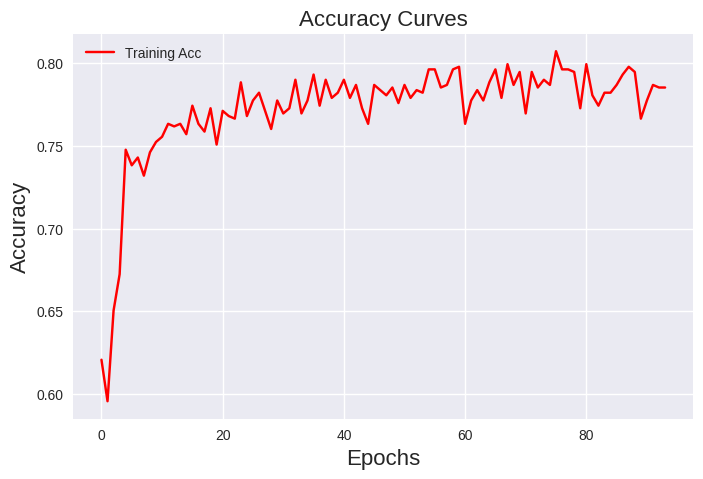

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [ ]:
import numpy as np

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 73.38


---